<a href="https://colab.research.google.com/github/anandhitha/Machine-Learning-with-Python/blob/master/R7_Internal_lab_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [ ]:
import tensorflow as tf

In [ ]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [ ]:
x_train.shape[1:3]

(28, 28)

In [ ]:
### Find dimensions of an image in the dataset

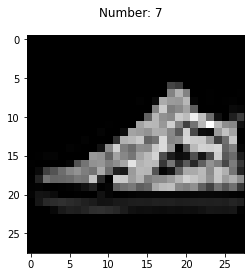

In [ ]:
#Let's review the data
import matplotlib.pyplot as plt
import numpy as np
img_num = np.random.randint(0, x_test.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(x_test[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(y_test[img_num]))
plt.show()

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [ ]:
#Convert labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [ ]:
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [ ]:
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
x_train/=255
x_test/=255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [ ]:
#(number_of_samples/batch_size, image_Width, image_height, number of channels)
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [ ]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Convolution2D(32,kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10, activation='softmax'))

#Loss and Optimizer
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 5, verbose = 1, mode = 'auto', min_delta=0.001)

callback_list = [early_stopping]
model.fit(x_train, y_train, batch_size = 500, epochs = 20, validation_data = (x_test, y_test), callbacks = callback_list)

Epoch 1/20
120/120 [==============================] - 2s 18ms/step - loss: 0.8034 - accuracy: 0.7176 - val_loss: 0.4033 - val_accuracy: 0.8593
Epoch 2/20
120/120 [==============================] - 2s 16ms/step - loss: 0.3267 - accuracy: 0.8838 - val_loss: 0.3179 - val_accuracy: 0.8881
Epoch 3/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2639 - accuracy: 0.9039 - val_loss: 0.2883 - val_accuracy: 0.8956
Epoch 4/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2348 - accuracy: 0.9160 - val_loss: 0.2832 - val_accuracy: 0.8982
Epoch 5/20
120/120 [==============================] - 2s 16ms/step - loss: 0.1998 - accuracy: 0.9272 - val_loss: 0.2676 - val_accuracy: 0.9031
Epoch 6/20
120/120 [==============================] - 2s 16ms/step - loss: 0.1820 - accuracy: 0.9325 - val_loss: 0.2583 - val_accuracy: 0.9073
Epoch 7/20
120/120 [==============================] - 2s 16ms/step - loss: 0.1563 - accuracy: 0.9425 - val_loss: 0.2526 - val_accuracy: 0.9107

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [ ]:
model2 = Sequential()
model2.add(Convolution2D(32, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)))
model2.add(Convolution2D(32,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128,activation = 'relu'))
model2.add(Dense(10, activation='softmax'))

#Loss and Optimizer
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 5, verbose = 1, mode = 'auto', min_delta=0.001)

callback_list = [early_stopping]
model2.fit(x_train, y_train, batch_size = 500, epochs = 20, validation_data = (x_test, y_test), callbacks = callback_list)

Epoch 1/20
120/120 [==============================] - 2s 18ms/step - loss: 0.8653 - accuracy: 0.7140 - val_loss: 0.4056 - val_accuracy: 0.8566
Epoch 2/20
120/120 [==============================] - 2s 16ms/step - loss: 0.3760 - accuracy: 0.8676 - val_loss: 0.3390 - val_accuracy: 0.8814
Epoch 3/20
120/120 [==============================] - 2s 16ms/step - loss: 0.3182 - accuracy: 0.8885 - val_loss: 0.3065 - val_accuracy: 0.8899
Epoch 4/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2923 - accuracy: 0.8934 - val_loss: 0.2901 - val_accuracy: 0.8955
Epoch 5/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2641 - accuracy: 0.9039 - val_loss: 0.2877 - val_accuracy: 0.8938
Epoch 6/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2457 - accuracy: 0.9107 - val_loss: 0.2610 - val_accuracy: 0.9061
Epoch 7/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2219 - accuracy: 0.9191 - val_loss: 0.2539 - val_accuracy: 0.9064

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Define some parameters
img_size = 28
img_depth = 1

#ImageDataGenerator declaration with 10% data as test (90% for training)
datagen= ImageDataGenerator(featurewise_center = False, # set input mean to be over 0 over the dataset
                            samplewise_center = False, # set each sample mean to 0
                            featurewise_std_normalization = False, # divide inputs by std of the dataset
                            samplewise_std_normalization = False, # divide inputs by std of the dataset
                            rotation_range=50, 
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=False, # randomly flip images horizontally
                            vertical_flip = False) # randomly flip images vertically

# prepare the data generator
datagen.fit(x_train)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

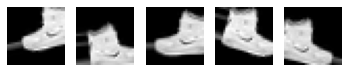

In [ ]:
from matplotlib import pyplot as plt
train_gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [ ]:
model3 = Sequential()
model3.add(Convolution2D(32, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)))
model3.add(Convolution2D(32,kernel_size=(3,3),activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128,activation = 'relu'))
model3.add(Dense(10, activation='softmax'))

#Loss and Optimizer
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 5, verbose = 1, mode = 'auto', min_delta=0.001)

callback_list = [early_stopping]
model3.fit_generator(datagen.flow(x_train,y_train, batch_size=32),
                    epochs=20,
                    steps_per_epoch= x_train.shape[0]//32,  #Number of training images//batch_size
                    validation_data=(x_test,y_test),
                    callbacks = callback_list)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.9777 - accuracy: 0.6424 - val_loss: 0.5409 - val_accuracy: 0.7968
Epoch 2/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5885 - accuracy: 0.7758 - val_loss: 0.4976 - val_accuracy: 0.8156
Epoch 3/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5175 - accuracy: 0.8033 - val_loss: 0.4275 - val_accuracy: 0.8460
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4688 - accuracy: 0.8236 - val_loss: 0.4272 - val_accuracy: 0.8385
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4503 - accuracy: 0.8303 - val_loss: 0.3922 - val_accuracy: 0.8588
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4271 - accuracy: 0.8398 - val_loss: 0.3681 - val_accuracy: 0.8650
Epoch 7/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4044 - accuracy: 0.8487 - val_loss: 0.4128 - val_a

###  Report the final train and validation accuracy

In [ ]:
#Model Summary
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [ ]:
#Model Summary
model3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3407 - accuracy: 0.8860


[0.34065157175064087, 0.8859999775886536]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [ ]:
from keras.datasets import cifar10
(trainX, trainY), (testX, testY) = cifar10.load_data()

In [ ]:
trainX.shape

(50000, 32, 32, 3)

In [ ]:
testX.shape

(10000, 32, 32, 3)

In [ ]:
trainY.shape

(50000, 1)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [ ]:
#ImageDataGenerator declaration with 10% data as test (90% for training)
datagen1= ImageDataGenerator(featurewise_center = False, # set input mean to be over 0 over the dataset
                            samplewise_center = False, # set each sample mean to 0
                            featurewise_std_normalization = False, # divide inputs by std of the dataset
                            samplewise_std_normalization = False, # divide inputs by std of the dataset
                            rotation_range=50, 
                            width_shift_range=0.2,
                            height_shift_range=0.1,
                            horizontal_flip=True, # randomly flip images horizontally
                            vertical_flip = True) # randomly flip images vertically

### **Prepare/fit the generator.**

In [ ]:
# prepare the data generator
datagen1.fit(trainX)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

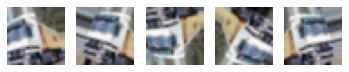

In [ ]:
from matplotlib import pyplot as plt
gen1 = datagen1.flow(trainX[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen1.next().astype('uint8').squeeze())
    plt.plot()
plt.show()